In [1]:
# Always reload imports if the file is changed on disk - this makes your changes in actr.py visible to the notebook
%load_ext autoreload
%autoreload 2

# Import matplotlib and allow your graphs to show up in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import actr # Make a file named actr.py so that this import line works

## Build an ACT-R Model

In this problem, you'll build a simplified ACT-R learner to recognize the past-tense of English verbs. This problem illustrates that while ACT-R is built on production rules, it also uses lots of machinery we'll talk about more later in the term, such as varying activation of production rules in order to capture the fact that people act differently in different situations. For this problem, you'll create a python module named `actr.py`. Place this file in the same directory as this notebook.
    
Included with the problem set are three files relevant to this problem: [verbChunks.txt](data/verbChunks.txt), [childesFrequency.txt](data/childesFrequency.txt), and [lags.txt](data/lags.txt). `verbChunks.txt` contains 10 English verbs. The first column is the name of the verb, the second column is the stem of the past tense of the verb, and the third column is the suffix of the past tense. `childesFrequency.txt` is the parental frequency count of each past tense verb in the [CHILDES corpus](https://childes.talkbank.org/) (Li & Shirai, 2000). CHILDES is a collection of transcripts of speech between children and parents (and occasionally experimenters); parental frequency count is how often a particular word was used by an adult. `lags.txt` is a collection of hypothetical time lags that might have elapsed since seeing instances of each of the past tense forms. Each of the ten columns in lags corresponds to a past tense form from chunks. The time lag in each row of lags is from a different instance of seeing that chunk. The number of lags for a chunk is (roughly) equal to the number of times that word was seen divided by 10; the lags are to a sampling of the occurrences rather than all of them, but you can generally ignore this fact when working through this problem.

### Baseline activations

The baseline activation of a chunk for an ACT-R learner is:
        \begin{align}
            \text{activation} = \ln \sum_{\text{lag} \in \text{lags}} \text{lag}^{-d},
        \end{align}
        where the sum is over the collection of time lags for a single verb, $d$ is the decay parameter of the model, and $\ln$ is a logarithm with base $e$ ("natural log"). 

<div class="alert alert-success" role="alert">
<h3>Part (a)</h3>
<p>
In your `actr.py` module, create:
<ul>
<li> A function `baseline\_activation` that takes two parameters: a float $d$ and a list of lags, and returns the baseline activation for a chunk with the given lag times.
<li> A function `compute\_all\_baselines` that takes one filename as a parameter: this should be a file of time lags (like `lags.txt`, although as with all homework specifications, anything in the same format - same columns - should work) with each column corresponding to one verb. This function should return a list of all baseline activations. Assume that we use a default decay parameter of $0.5$; we'll keep this decay parameter the same for the remainder of the problem. 
</ul>

In the cell below, use your module to compute the baseline activations for the verbs in the Childes data. This cell should also create a bar graph showing the baseline activations for these verbs. Like all graphs you create for this class, you should make sure both axes are labeled and the graph should have a title.
</div>

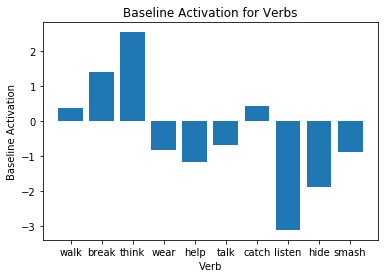

In [3]:
baseline_activations = actr.compute_all_baselines("data/lags.txt")
verbs = list(actr.read_frequency("data/childesFrequency.txt").keys())
plt.bar(np.arange(len(verbs)), baseline_activations)
plt.title("Baseline Activation for Verbs")
plt.xlabel("Verb")
plt.ylabel("Baseline Activation")
plt.xticks(np.arange(len(verbs)), verbs)
plt.show()

<div class="alert alert-success" role="alert">
<h3>Part (b)</h3><p>
Examine the baseline activation of “hide” versus “smash”. Which one has a higher activation? In the cell below, explain why this word has a higher activation, making reference both to how the activation is computed and the values for the time lags. Your explanation should help the reader make sense of the relationships between time lags and activations - it shouldn’t just say something like “the formula gives a higher number for word1 versus word2.”

From the bar chart in Part(a), the word "smash" has a higher baseline activation than the word "hide". The reason for the difference is caused by the value of the time lag. From the data file [lags.txt](data/lags.txt), we can easily find that both words are seen for three times. However, the time lag between the word "smash" is much smaller than the time lag for "hide". More specifically, the time lags between each incidence for smash is 26, 58 153, while the time lags for "hide" is 268, 482 and 482. As a result, "smash" will leave a stronger impression in the learner's mind, and scores a higher value in the baseline activation. This finding also corresponds with the mathematical expression for activation.  Basically, a large value of $lag$ will result in a small value of $lag^{-d}$, and thus a smaller value in activation.

### Relating baseline activation and frequency

<div class="alert alert-success" role="alert">
<h3>Part (c)</h3><p>
Explain the relationship between the frequency of each verb (in `childesFrequency.txt`) and the baseline activations. In general, what sort of pattern do you observe and why? Include in this section the code to create a scatter plot where the frequency of each verb is on the x-axis and the baseline activation for that verb is on the y-axis.

Text(0.5, 1.0, 'Frequency vs. Baseline Activation for Verbs')

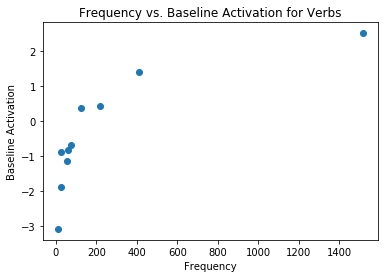

In [4]:
frequencies = actr.read_frequency("data/childesFrequency.txt").values()
plt.scatter(list(frequencies), baseline_activations)
plt.xlabel("Frequency")
plt.ylabel("Baseline Activation")
plt.title("Frequency vs. Baseline Activation for Verbs")

The scatter plot shows that there exits some sort of Logarithmic relationship between the baseline activation with frequency. When the frequency is relatively small, a small change in frequency corresponds to a large change in baseline activation. While after a certain value, the baseline activation becomes insensitive to the change in frequency. 

### Retrieval

The activation of a chunk controls how easy it is to retrieve from memory. We assume an activation threshold of $\tau = 0.3$: a chunk can only be retrieved from memory if its activation is greater than 0.3. 

<div class="alert alert-success" role="alert">
<h3>Part (d)</h3><p>
Given the activations you computed in part (a), which past tense forms can be retrieved from memory by this learner? In the cell below, include code that computes and displays your answer. 
</div>

In [5]:
retrievable_index = []
for i in range(len(baseline_activations)):
    if baseline_activations[i] > 0.3:
        retrievable_index.append(i)
        print("".join(actr.read_verb_chunks("data/verbChunks.txt")[verbs[i]]))

walked
broke
thought
caught


<div class="alert alert-success" role="alert">
<h3>Part (d, continued)</h3><p>
Imagine there's a word that has only been seen once (so there's exactly one time lag). For how long after exposure could the learner retrieve this word from memory, assuming the default decay and activation thresholds? Explain your answer, including showing relevant work (math or coding) and a short text explanation.
</div>

Assume the time lag is $l$, and $activation = ln(l^{-d})=ln(l^{-0.5})$. Considering the word can only be retrieved from memory if $activation > 0.3$, the inequality becomes $ln(l^{-0.5})>0.3$. By solving this inequality, we get $l<(\frac{1}{e^{0.3}})^2 \approx 0.549$. Thus, the learner can retrieve the word from from memory after 0.549 unit of time. 

### Time lags and retrieval

<div class="alert alert-success" role="alert">
<h3>Part (e)</h3><p>
Imagine there are two different words. Both have been seen by the learner ten times. Create two different series of time lags such that the first word is retrievable from memory but the second word is not. Write down these timelags in the cell below, and demonstrate that the first word is retrievable from memory and the second is not.

In [6]:
time_lag_one = [1,1,1,1,1,1,1,1,1,1]
time_lag_two = [100,100,100,100,100,100,100,100,100,100]
print("Baseline activation for the first word: " + str(actr.baseline_activation(0.5, time_lag_one)))
print("Baseline activation for the second word: " + str(actr.baseline_activation(0.5, time_lag_two)))

Baseline activation for the first word: 2.302585092994046
Baseline activation for the second word: -1.1102230246251565e-16


From the computation above, the first word has a baseline activation greater than $0.3$ so it is retrievable, while the second word is smaller than $0.3$ so it is not retrievable.

### Retrieval time

For chunks that have high enough activation to be retrieved, retrieval time $t$ is computed as $t = F\cdot \exp(-fA)$, where $A$ is the baseline activation and $F, f$ are parameters of the model. $\exp$ means the mathematical constant $e$ raised to a particular power; for instance, $\exp(-fA) = e^{-fA}$. 

<div class="alert alert-success" role="alert">
<h3>Part (f)</h3><p>
In your `actr.py` module, write a function `retrieval\_time` that takes three parameters: (1) the activation, (2) $F$, and (3) $f$. This function should return the retrieval time for the chunk. 
<p><p>
In the cell below, use $F = 0.5$ and $f = 0.25$ to compute the retrieval time for all the past tense forms that have high enough activation to be retrieved. Print out the retrieval times, labeled with which verbs they refer to.

In [7]:
print("verb, retrieval time")
for i in retrievable_index:
    print(verbs[i]+",", actr.retrieval_time(baseline_activations[i], 0.5, 0.25))

verb, retrieval time
walk, 0.45400865264495743
break, 0.35204015258394017
think, 0.26545198810389925
catch, 0.4493173421730762


 <div class="alert alert-success" role="alert">
<h3>Part (g)</h3>
<p> Experiment with different values of $f$, restricting yourself to values in between 0 and 1. In the cell below, describe the pattern of how the magnitude of this parameter affects the retrieval time. You should include evidence from your experimentation to support the pattern you describe (you can include this evidence in additional cells, interspersed with text in any way that helps you explain the pattern).

Text(0.5, 1.0, 'Parameter $f$ vs. Retrieval Time for Retrievable Verbs')

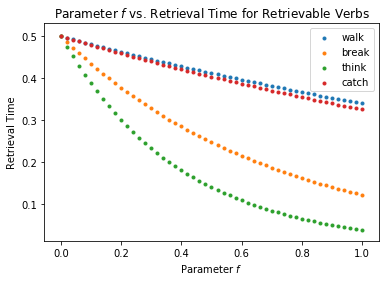

In [8]:
verb_times_map = {}
f_values = np.linspace(0,1,51)
for i in retrievable_index:
    verb_times_map[verbs[i]] = []
    for f in f_values:
        verb_times_map[verbs[i]].append(actr.retrieval_time(baseline_activations[i], 0.5, f))

for verb in verb_times_map:
    plt.scatter(f_values, verb_times_map[verb], marker = ".", label = verb)
plt.legend(loc = 'best')
plt.xlabel("Parameter $f$")
plt.ylabel("Retrieval Time")
plt.title("Parameter $f$ vs. Retrieval Time for Retrievable Verbs")

The scattered plot shows that there exists an exponential relationship between retrieval time and $f$. The trend is also related to the baseline activation. When $f$ increases, the retrieval time decrases more significantly for words with a bigger baseline activation such as "think" and "break", while less significantly for words with small baseline activation such as "walk" and "catch".

### Utilities

An ACT-R learner only retrieves chunks from memory when retrieval is requested by a production rule. Production rules are selected according to their utility. The utility of a production rule $i$ is given by $U_{i} = P_{i}\cdot G - C_{i}$, where $P_i$ is the probability of success, $G$ is the value of the current goal, and $C_i$ is the cost
for using this rule (measured in units of time). We will assume that the value $G$ of creating a past tense form is equal to $5$. We will further make the simplifying assumption that the learner only has two possible rules for creating past tense forms: the regular past tense rule (``add -ed'') and the retrieval rule. 



 <div class="alert alert-success" role="alert">
<h3>Part (h)</h3>
<p>The regular past tense rule always succeeds in producing a past tense form, so $P_i=1$ for this rule. The cost $C_i$ for the regular rule is stipulated as a phonetic post-processing cost of $1.2$.
<br><br>
In your module `actr.py`, write a function `regular\_utility` that takes no parameters and uses these default values to compute the utility of the regular rule; the function should return the rule's utility. 

 <div class="alert alert-success" role="alert">
<h3>Part (i)</h3>
<p>
To compute the retrieval rule's utility, we need to average over the words that our learner will want to produce. We assume that our learner tries to produce forms in the lexicon according to their frequencies.  This probability of success, $P_i$, can be computed as the ratio of the total frequency of words above the activation threshold $\tau$ to the total frequency of all words. You also need to know the average cost $C_i$, which is equal to the average retrieval time. The average retrieval time is the average of the retrieval times for all words in the vocabulary that can be retrieved, weighted by their frequency. For instance, assume there are two words in the vocabulary: word1 has retrieval time 2 and frequency 10, and word2 has retrieval time 1 and frequency 1. The average retrieval time is $(2\times 10 + 1\times 1)/(10+1)$. Words that cannot be retrieved do not count towards the cost.

In `actr.py`, write a function `retrieval\_utility` which takes two parameters: (1) the path for a frequency file (like `data/childesFrequency.txt`) and (2) the path for a time lags file (like `data/lags.txt`). This function should return the utility of the retrieval rule based on the given frequencies and lags.  When calculating retrieval times, assume $F = 0.5$, $f = 0.25$, and $G = 5$. 

Use your function to compute the utility of the retrieval rule given the data you have been provided, and print out the results in the cell below for the utility of the regular rule and the utility of the retrieval rule.

In [9]:
print("Utility for regular rule: " + str(actr.regular_utility()))
print("Utility for retrieval rule: " + str(actr.retrieval_utility("data/childesFrequency.txt", "data/lags.txt")))

Utility for regular rule: 3.8
Utility for retrieval rule: 4.194717221278417


 <div class="alert alert-success" role="alert">
<h3>Part (j)</h3>
<p>
Assume the learner always starts by using the rule with higher utility, and then if the first rule fails (i.e., can't be executed with this word), uses the rule with lower utility. Given the data distributed with the problem set, which past tense forms will your learner produce correctly? Which past tense forms will your learner over-regularize? Over-regularizing is when a rule like ``add -ed'' is used for verbs it shouldn't be, such as saying ``I thinked'' rather than ``I thought.'' Write your answers in the cell below, showing any work supporting your answers.

In [10]:
irretrievable_index = []
over_regularize_words = ""
irretrievable_words= ""

for i in range(len(baseline_activations)):
    if baseline_activations[i] <= 0.3:
        irretrievable_index.append(i)
        this_word_stem = actr.read_verb_chunks("data/verbChunks.txt")[verbs[i]][0]
        this_word_present = verbs[i]
        irretrievable_words += " " + this_word_present
        if this_word_stem != this_word_present:
            over_regularize_words += " " + this_word_present

print("Irretrieveble words: " + irretrievable_words)
print("Over-regularizing words: " + over_regularize_words)

Irretrieveble words:  wear help talk listen hide smash
Over-regularizing words:  wear hide


The first line above includes the past tense for words that cannnot be retrieved. For those words, the learner will apply the regular rule. As we can see, the words "help, talk, listen and smash" all follow the regular rule while the words "wear" and "hide" do not. Therefore, the learner tends to over-regularize "wear" and "hide". 

### Overregularization and ACT-R

 <div class="alert alert-success" role="alert">
<h3>Part (j)</h3>
<p>
Some studies of children's overregularization have found that children start off not overregularizing the verbs they know, then overregularize for a period of time, and then finally consistently produce correct verbs. Could this pattern be consistent with this simplified ACT-R model? Explain why or why not, making reference to trends in the data that you might expect to see and how this would or would not lead to the proposed pattern.

The simplified ACT-R model does account for the result of those studies. From what we computed in Part(d), we know that the ACT-R model predicts that learner can retrieve the word from memory after 0.549 unit of time if the word is only seen once. Assume the word is the first word that the child learns, the utility for retrieval rule will be $U_i=P_iG-C_i > 1\times5 - 0.5⋅exp(−0.5⋅0.3) \approx 4.43 $ in that period of time. Compared to the utility for the regular rule, the child will apply the retrieval rule which has greater utility and will not overregularize this word. 

But when the number of words increases, there will exist some words that children cannot activate their past tense, e.g the words shown in previous section. Also, some words might have a long time lag, which results in a small baseline activation and long retrieval time. Thus, the cost $C_i$ will also increase. As a result, the $U_i$ for the retrieval rule will decrease. The inability to activate word and the decrease in the utility of retrieval rule are two major causes for the children start to apply the regular rule and overregularize words.

However, when the number of times for seeing the word increase, the baseline activation for that word will increase and reach the threshold, which is $0.3$ in this model. Also, in part(g), we illustrate that the retrieval time has a decreasing trend if either $f$ or $A$ increases. Specifically in this case, the increase in baseline activation will cause the decrease in retrieval time, which means the $C_i$ will decrease and $U_i$ for retrieval rule will increase. Thus, children will apply the retrieval rule again and not overregularize anymore.   